In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import statsmodels.formula.api as sm
import statsmodels.api as sm2

In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# add the prices to the df
bos["PRICE"] = boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# hmm do linear regression from scratch or use a library?
res = sm.ols("PRICE ~ LSTAT", bos).fit()

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           5.08e-88
Time:                        17:39:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# residual statistics
# lets also try with sklearn
residuals = res.resid
min_resid = min(residuals)
max_resid = max(residuals)
std_err_resid = pow(res.mse_resid,0.5)

In [10]:
res.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


In [15]:
# I'm sure there is a more efficient way to this
# TODO look up more efficient way to do this
new_x = pd.DataFrame([5, 10, 15])
new_x.columns = ['LSTAT']

In [16]:
a = res.predict(new_x)

In [17]:
# come with confidence intervals and prediction intervals
a

array([ 29.80359411,  25.05334734,  20.30310057])

In [19]:
new_x['PRED'] = a

In [21]:
new_x

,LSTAT,PRED
0,5,29.803594
1,10,25.053347
2,15,20.303101


In [96]:
# add confidence intervals
from scipy import stats

def get_rse(res):
    return np.sqrt(res.mse_resid)


def supporting_statistics(data):
    x_bar = np.average(data)
    x_std = np.std(data)
    data_len = len(data)
    
    return x_bar, x_std, data_len
    

def confidence_intervals(x, pred, x_bar, x_std, data_len, se):
    x = 1/data_len + (pow(x - x_bar, 2)/((data_len - 1) * pow(x_std, 2)))
    conf_low = pred - stats.t.ppf(1 - 0.025, 198) * se * pow(x, 0.5)
    conf_hi = pred + stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)
    return conf_low, conf_hi
    
def prediction_intervals(x, pred, x_bar, x_std, data_len, se):
    x = 1 + 1/data_len + (pow(x - x_bar, 2)/((data_len - 1) * pow(x_std, 2)))
    conf_low = pred - stats.t.ppf(1 - 0.025, 198) * se * pow(x, 0.5)
    conf_hi = pred + stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)
    return conf_low, conf_hi
    

In [97]:
a,b,c = map(float, supporting_statistics(bos['LSTAT']))
rse = get_rse(res)

# TODO fix this hack
# TODO finish indexing properly and getting the data in one frame
for index, ii in enumerate(zip(new_x['LSTAT'], new_x['PRED'])):
    ii, jj = ii
    new_x.iloc[:index+1]['C_LWR'], new_x.iloc[:index+1]['C_UPR'] = confidence_intervals(ii,jj, a,b,c, rse)
    new_x.iloc[:index+1]['P_LWR'], new_x.iloc[:index+1]['P_UPR'] = prediction_intervals(ii,jj, a,b,c, rse)

/Users/ishaanvarshney/Projects/stats/venv/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ishaanvarshney/Projects/stats/venv/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [94]:
for ii in enumerate(zip(new_x['LSTAT'], new_x['PRED'])):
    print(ii)


(0, (5, 29.803594110593121))
(1, (10, 25.053347341803168))
(2, (15, 20.303100573013214))


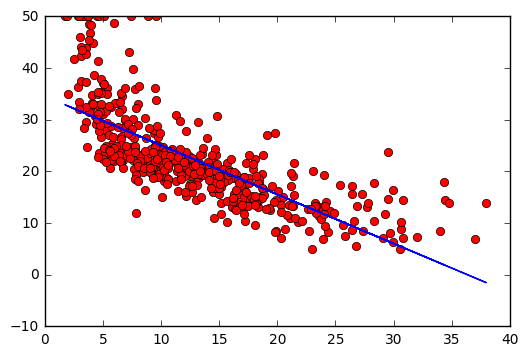

In [108]:
# plot the regression
plt.plot(bos['LSTAT'], bos['PRICE'], 'ro')
plt.plot(bos['LSTAT'], res.fittedvalues, 'b')

from the plot above we can see there is evidence for non linear data.

In [109]:
# TODO see if there is the equivalent of R's par() in python


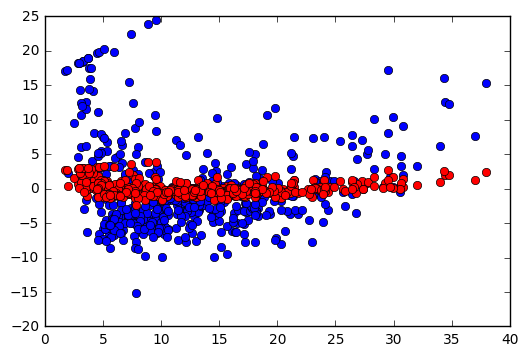

In [114]:
# plotting the residuals
# plt.plot(bos['LSTAT'], res.fittedvalues, 'b')
# TODO what is the difference between pearson_resid and normal resid
# TODO what is the significance of the studentized residuals and plain residuals
plt.plot(bos['LSTAT'], res.resid, 'bo')
plt.plot(bos['LSTAT'], res.resid_pearson, 'ro')

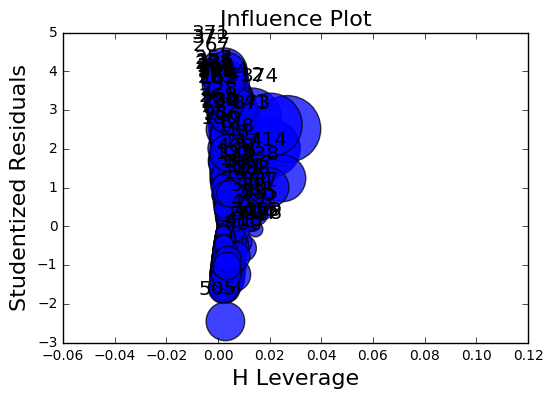

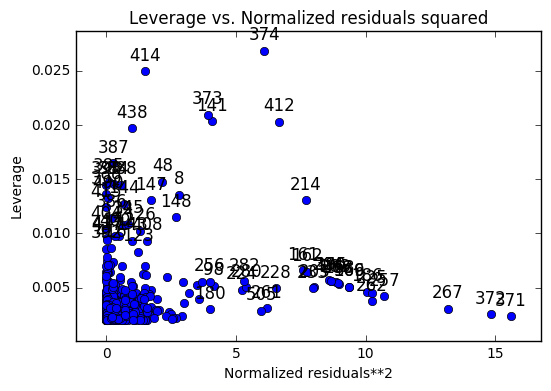

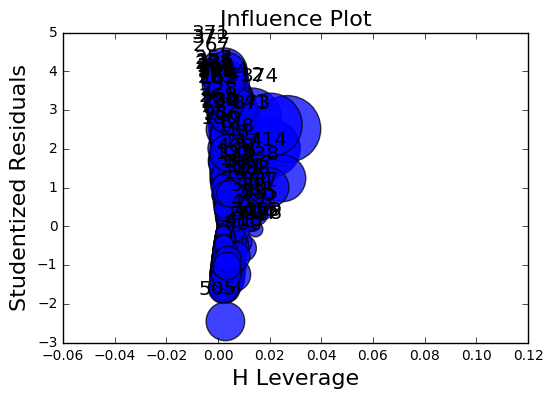

In [118]:
# TODO why is this printing dups
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
plot_leverage_resid2(res)
influence_plot(res)